In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [30]:
# Reading the dataset into a dataframe 
df = pd.read_csv('tested.csv')
df.head()
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


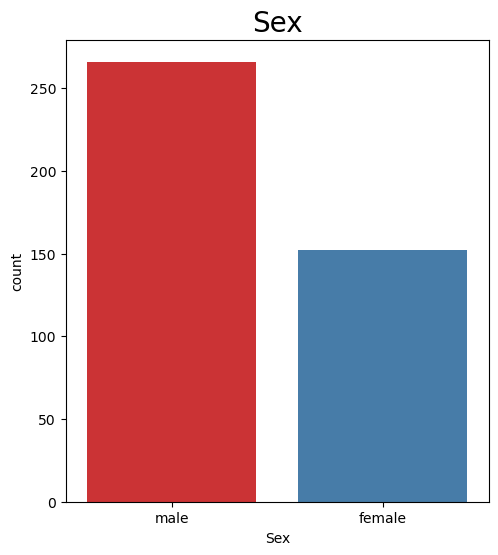

In [54]:
plt.figure(figsize=(12, 6))

# Countplot for 'Sex'
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title("Sex", fontsize=20)

plt.show()

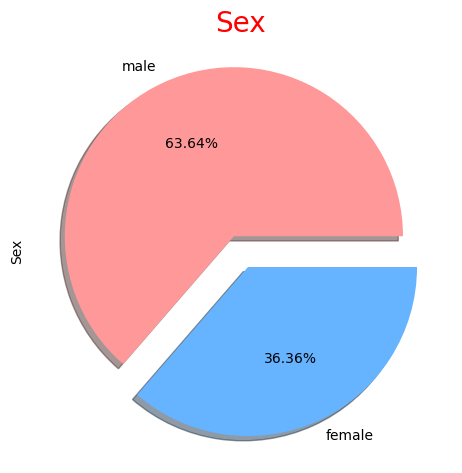

In [55]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=['#ff9999', '#66b3ff'])
plt.title("Sex", fontsize=20, color='Red')

plt.show()

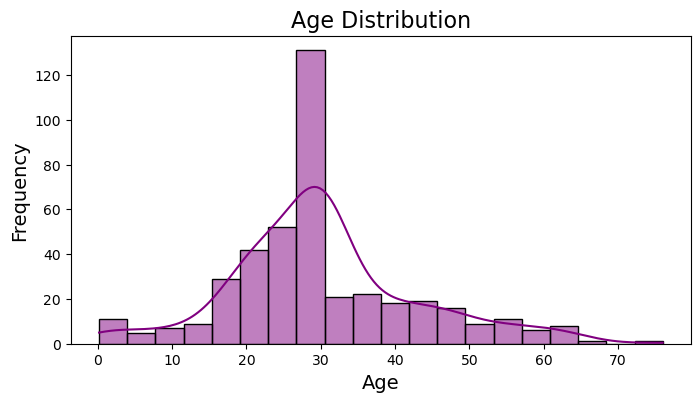

In [58]:
plt.figure(figsize=(8, 4))

# Create a histogram (distribution plot) for the 'Age' column
sns.histplot(data=df, x='Age', bins=20, kde=True, color='purple')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)

plt.show()

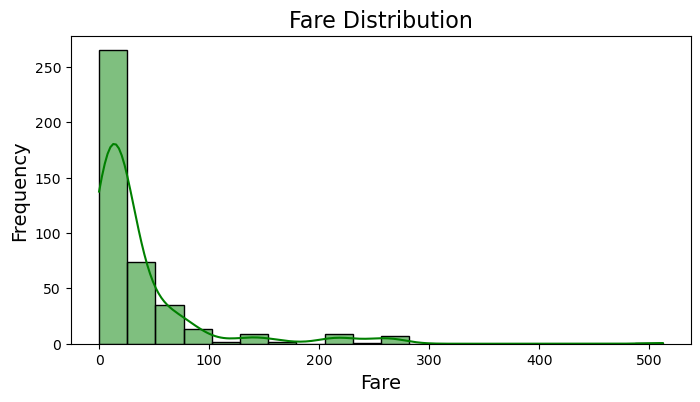

In [59]:
plt.figure(figsize=(8, 4))  # Set the figure size

# Create a histogram (distribution plot) for the 'Fare' column
sns.histplot(data=df, x='Fare', bins=20, kde=True, color='green')

plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Fare Distribution', fontsize=16)

plt.show()

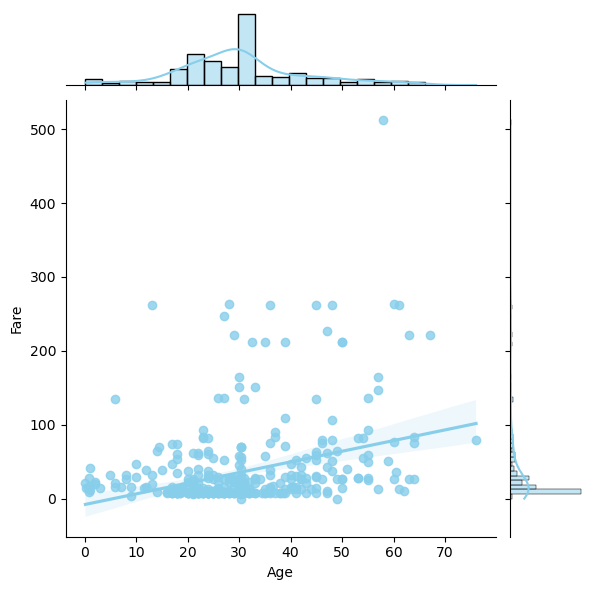

In [62]:
# AGE VS FARE 
sns.jointplot(x="Age", y="Fare", data=df, kind="reg", color="skyblue")
plt.show()

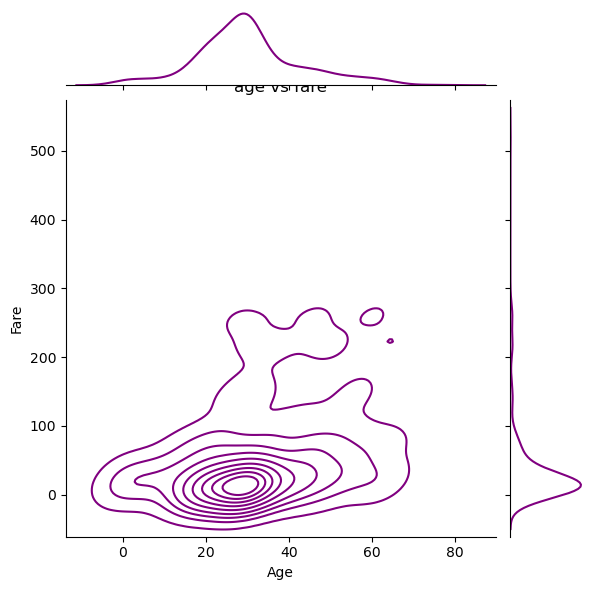

In [70]:
# AGE VS FARE 
sns.jointplot(x="Age", y="Fare", data=df, kind="kde", color="purple")
plt.show()

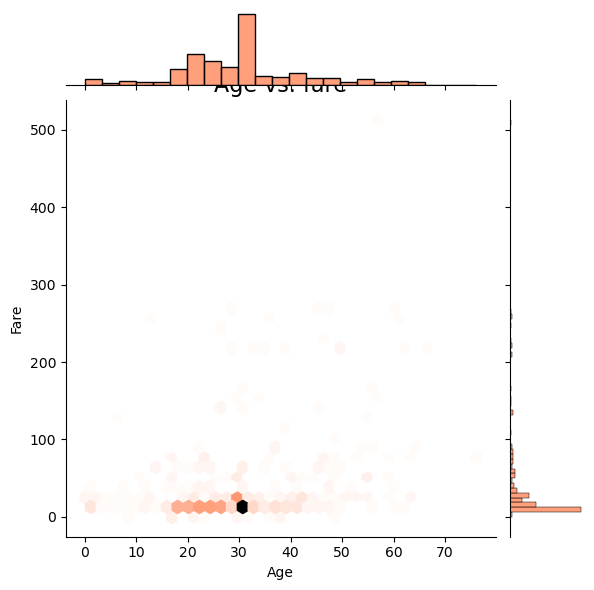

In [69]:
# AGE VS FARE 
sns.jointplot(x="Age", y="Fare", data=df, kind="hex", color="coral")
plt.show()

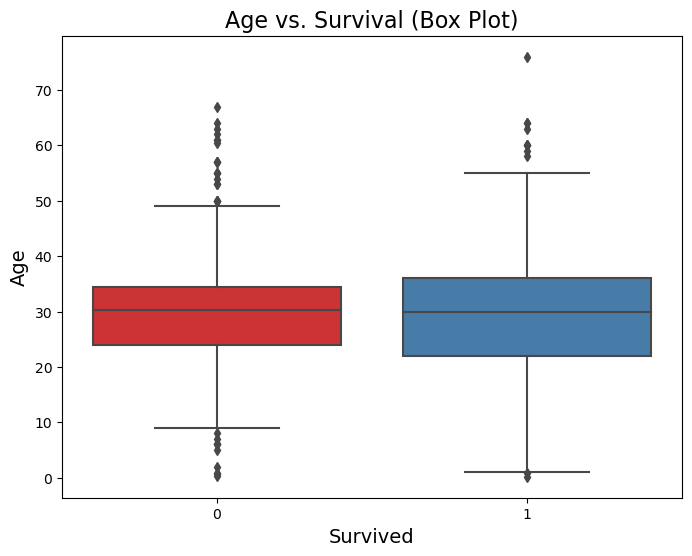

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=df, palette="Set1")
plt.title("Age vs. Survival (Box Plot)", fontsize=16)
plt.xlabel("Survived", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

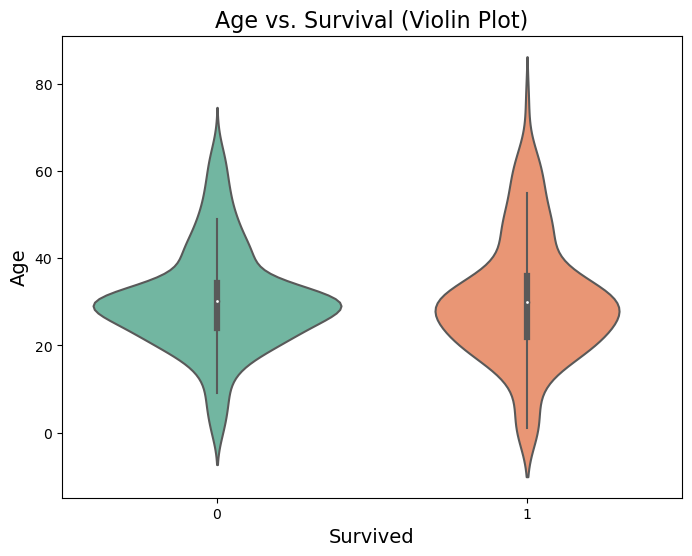

In [66]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title("Age vs. Survival (Violin Plot)", fontsize=16)
plt.xlabel("Survived", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

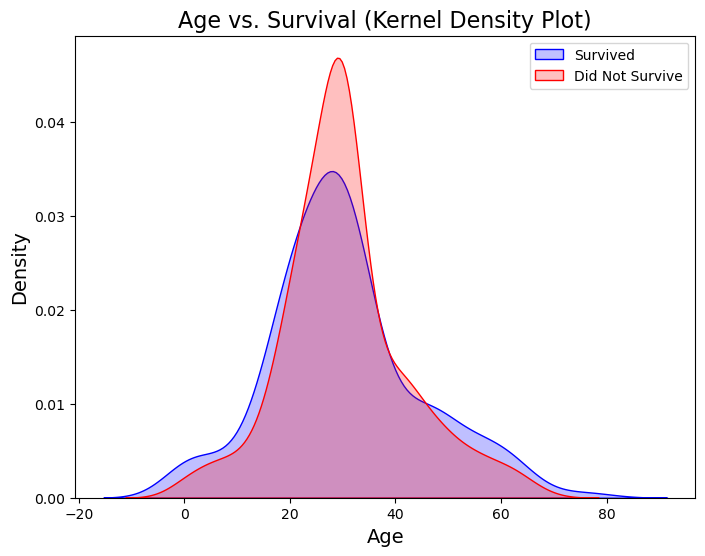

In [67]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df["Survived"] == 1]["Age"], label="Survived", shade=True, color="blue")
sns.kdeplot(df[df["Survived"] == 0]["Age"], label="Did Not Survive", shade=True, color="red")
plt.title("Age vs. Survival (Kernel Density Plot)", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

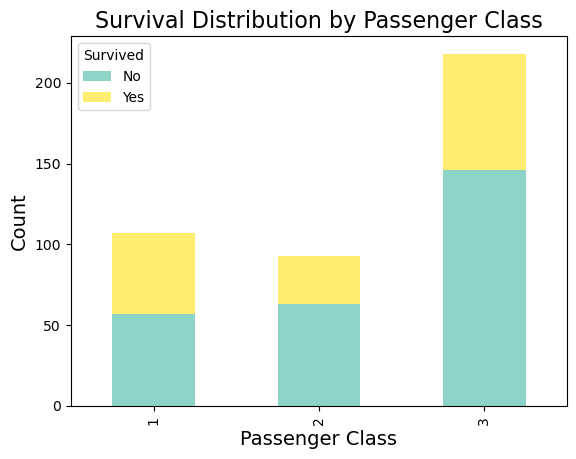

In [68]:
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Survival Distribution by Passenger Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

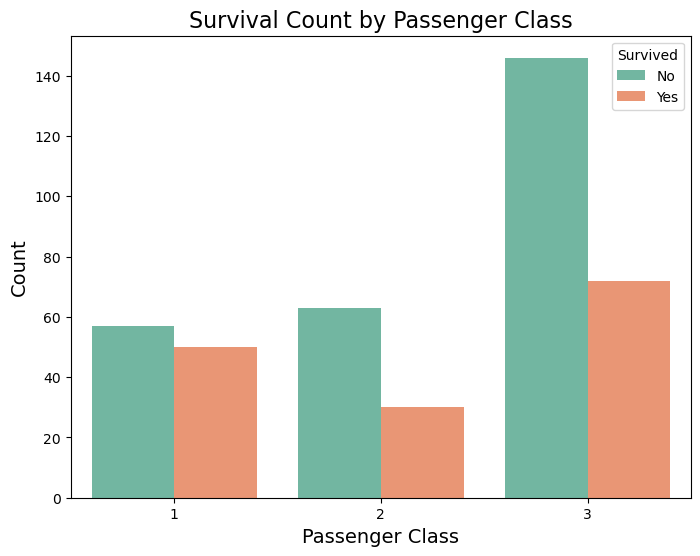

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set2")
plt.title("Survival Count by Passenger Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [32]:
df.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [33]:
#removing null values and replacing with mean age
df['Age'] = df['Age'].fillna(df['Age'].mean()) 

df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# droping the uselass columns to make the code easy to work with for the model
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [34]:
df.isnull().sum().sort_values(ascending= False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
df.tail(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S
417,0,3,male,30.27259,1,1,22.3583,C


In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a DataFrame containing the 'Survived', 'Pclass', 'Sex', and 'Embarked' columns
columns = ['Survived', 'Pclass', 'Sex', 'Embarked']
ship_subset = df[columns]

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for column in columns:
    ship_subset[column] = label_encoder.fit_transform(ship_subset[column])

# Now, concatenate the encoded columns back into the original DataFrame
encoded_df = pd.concat([df.drop(columns=columns), ship_subset], axis=1)

# Display the resulting DataFrame
encoded_df.head(5)

,Age,SibSp,Parch,Fare,Survived,Pclass,Sex,Embarked
0,34.5,0,0,7.8292,0,2,1,1
1,47.0,1,0,7.0000,1,2,0,2
2,62.0,0,0,9.6875,0,1,1,1
3,27.0,0,0,8.6625,0,2,1,2
4,22.0,1,1,12.2875,1,2,0,2


In [37]:
#spliting dependent and independent variable 
X = encoded_df.drop(['Survived'],axis=1)
# X contains the independent variables. Independent variables are the features or attributes of your dataset that you will use to make predictions
y = df['Survived']
# Y contains the dependent variable. The dependent variable is what you are trying to predict or model

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 42)

In [39]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
118,36.00000,0,0,75.2417,0,1,0
271,30.27259,0,0,7.7500,2,1,1
114,63.00000,1,0,221.7792,0,0,2
311,22.00000,0,0,7.2250,2,1,0
131,53.00000,0,0,28.5000,0,1,0


In [40]:
y_train.head()

118    0
271    0
114    1
311    0
131    0
Name: Survived, dtype: int64

In [49]:
#LOGESTIC REGRESSION (ADITYA PANT)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate the logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate and print the training and test accuracy scores
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

print(f"Training set accuracy: {train_accuracy:.2%}\n")
print(f"Test set accuracy: {test_accuracy:.2%}\n")

# Calculate accuracy using the sklearn accuracy_score function
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2%}\n")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix, "\n")

# Print the classification report
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)

# Calculate and print mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mae)

print(f"MAE: {mae:.2f}\n")
print(f"MSE: {mse:.2f}\n")
print(f"RMSE: {rmse:.2f}\n")


Training set accuracy: 100.00%

Test set accuracy: 100.00%

Accuracy: 100.00%

Confusion Matrix:
 [[85  0]
 [ 0 41]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

MAE: 0.00

MSE: 0.00

RMSE: 0.00



In [50]:
#RANDOM FOREST CLASSIFIER (ADITYA PANT)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the RandomForestClassifier with gini criterion and 100 estimators
rf_classifier = RandomForestClassifier(criterion='gini', n_estimators=100)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print the training and test set scores
train_score = rf_classifier.score(X_train, y_train)
test_score = rf_classifier.score(X_test, y_test)

print(f"Training set score: {train_score:.2f}")
print(f"Test set score: {test_score:.2f}")

# Calculate accuracy score and print it
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy:.2f}")

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", confusion)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report)


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix:
 [[85  0]
 [ 0 41]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [51]:
#SUPPORT VECTOR MACHIENE (ADITYA PANT)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the SVM classifier with a linear kernel, auto gamma, and probability=True
svc_classifier = SVC(kernel='linear', gamma='auto', probability=True)

# Fit the model to the training data
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

# Calculate and print the training and test set scores
train_score = svc_classifier.score(X_train, y_train)
test_score = svc_classifier.score(X_test, y_test)

print(f"Training set score: {train_score:.2f}")
print(f"Test set score: {test_score:.2f}")

# Calculate accuracy score and print it
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy Score: {accuracy:.2f}")

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:\n", confusion)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_svc)
print("Classification Report:\n", class_report)


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix:
 [[85  0]
 [ 0 41]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [52]:
# DECISION TREE CLASSIFIER (ADITYA PANT)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the DecisionTreeClassifier
dec_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dec_classifier.fit(X_train, y_train)
y_pred_dec = dec_classifier.predict(X_test)

# Calculate and print the training and test set scores
train_score = dec_classifier.score(X_train, y_train)
test_score = dec_classifier.score(X_test, y_test)

print(f"Training set score: {train_score:.2f}")
print(f"Test set score: {test_score:.2f}")

# Calculate accuracy score and print it
accuracy = accuracy_score(y_test, y_pred_dec)
print(f"Accuracy Score: {accuracy:.2f}")

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred_dec)
print("Confusion Matrix:\n", confusion)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_dec)
print("Classification Report:\n", class_report)


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix:
 [[85  0]
 [ 0 41]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

